In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("car_data.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

df = df.drop_duplicates()

print("\nMissing Values:\n", df.isnull().sum())

label = LabelEncoder()
cat_cols = ["brand", "fuel_type", "transmission"]

for col in cat_cols:
    df[col] = label.fit_transform(df[col])

print("\nAfter Encoding:\n", df.head())

X = df[
    ["brand", "year", "kms_driven", "engine",
     "fuel_type", "transmission", "seats"]
]

y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nShapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)



Dataset Loaded Successfully!

    brand  year  kms_driven  engine fuel_type transmission  seats      price
0    Audi  2005       47504    1000    Petrol    Automatic      5  111838.80
1  Toyota  2011      142874    2000       CNG    Automatic      4  260974.30
2    Ford  2013       18155    1000    Diesel    Automatic      5  224275.25
3    Audi  2005       49384    1000    Petrol    Automatic      7   97768.80
4   Honda  2016      122561     800    Diesel    Automatic      4  242961.95

Missing Values:
 brand           0
year            0
kms_driven      0
engine          0
fuel_type       0
transmission    0
seats           0
price           0
dtype: int64

After Encoding:
    brand  year  kms_driven  engine  fuel_type  transmission  seats      price
0      0  2005       47504    1000          2             0      5  111838.80
1      6  2011      142874    2000          0             0      4  260974.30
2      2  2013       18155    1000          1             0      5  224275.25
3  

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=120, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\nModel Training Complete!")



Model Training Complete!



🔹 LINEAR REGRESSION RESULTS
MAE: 14319.524303851496
R2 Score: 0.9650490967362408

🔹 RANDOM FOREST RESULTS
MAE: 21660.60326388885
R2 Score: 0.9183929788637902

🚗 Predicted Car Price: 301899.7025000001


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


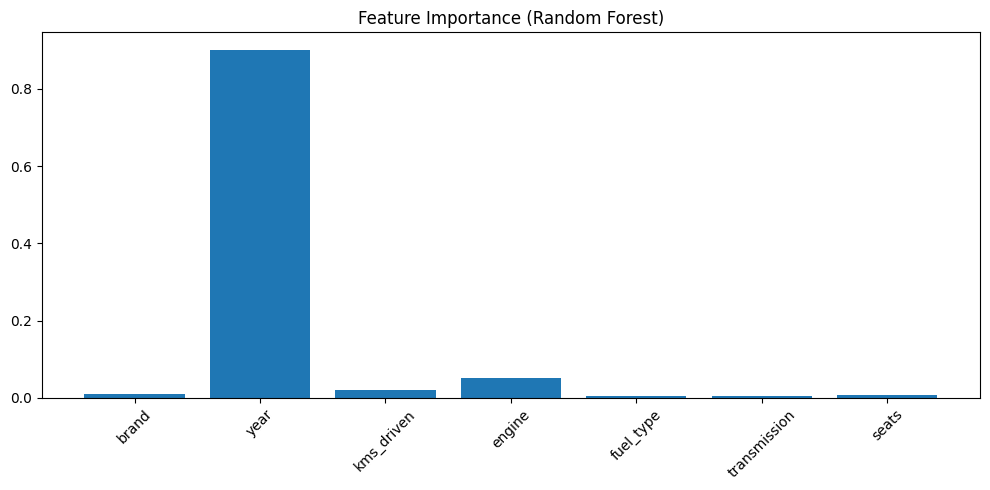

In [8]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


lr_pred = lr.predict(X_test)

print("\n🔹 LINEAR REGRESSION RESULTS")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("R2 Score:", r2_score(y_test, lr_pred))



rf_pred = rf.predict(X_test)

print("\n🔹 RANDOM FOREST RESULTS")
print("MAE:", mean_absolute_error(y_test, rf_pred))
print("R2 Score:", r2_score(y_test, rf_pred))


new_car = np.array([
    2,      # brand (encoded)
    2018,   # year
    45000,  # kms_driven
    1200,   # engine
    1,      # fuel_type (encoded)
    0,      # transmission (encoded)
    5       # seats
]).reshape(1, -1)

predicted_price = rf.predict(new_car)
print("\n🚗 Predicted Car Price:", predicted_price[0])


# ---- Feature Importance Graph ----
importances = rf.feature_importances_
cols = X.columns

plt.figure(figsize=(10,5))
plt.bar(cols, importances)
plt.title("Feature Importance (Random Forest)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


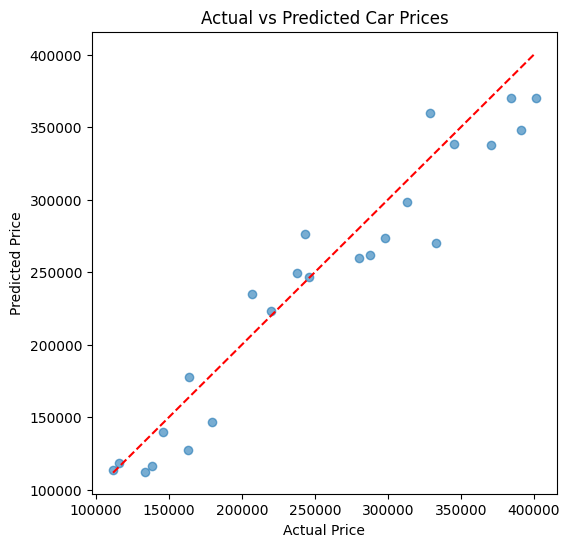

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
